
# 🎯 Clustering 알고리즘 완벽 비교 가이드
### 데이터로 배우는 K-Means vs DBSCAN vs Hierarchical

---

## 📋 프로젝트 개요

### 🎯 학습 목표
**각 클러스터링 알고리즘이 빛나는 상황을 실제 데이터로 체험하고, 언제 어떤 알고리즘을 써야 하는지 명확히 이해합니다.**

### 💡 핵심 아이디어
**"만능 클러스터링 알고리즘은 없다. 데이터 특성에 맞는 선택이 중요하다."**

---

## 🔬 3가지 실험 시나리오

### 📊 Scenario 1: 구형 군집 데이터 (Customer Segmentation)
- **데이터:** 고객의 구매금액 vs 방문빈도
- **특징:** 원형으로 잘 분리된 군집
- **최적 알고리즘:** ✅ **K-Means**
- **이유:** 빠르고 정확하며 해석이 쉬움

### 🌙 Scenario 2: 복잡한 형태 데이터 (Anomaly Detection)
- **데이터:** 제조 공정의 센서 데이터
- **특징:** 반달 모양, 긴 타원형 등 복잡한 형태 + 이상치
- **최적 알고리즘:** ✅ **DBSCAN**
- **이유:** 임의 모양 탐지 + 노이즈 자동 제거

### 🌳 Scenario 3: 계층 구조 데이터 (Product Categorization)
- **데이터:** 전자제품의 특성 (가격, 성능, 브랜드 등)
- **특징:** 대분류 → 중분류 → 소분류 구조
- **최적 알고리즘:** ✅ **Hierarchical**
- **이유:** 계층적 분류 체계를 명확히 시각화

---

## 🏗️ 분석 구조

| Scenario | 데이터 | 알고리즘 | 핵심 포인트 |
|:---:|:---|:---|:---|
| **1** | 고객 세분화 | K-Means 승리 | Elbow Method, Silhouette 최고 |
| **2** | 이상 탐지 | DBSCAN 승리 | **실루엣 스코어의 함정 발견**, ARI 지표 활용 |
| **3** | 상품 분류 | Hierarchical 승리 | 덴드로그램으로 3단계 계층 발견 |


In [1]:

# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
from sklearn.datasets import make_blobs, make_moons

# 전처리
from sklearn.preprocessing import StandardScaler

# 클러스터링 알고리즘
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# 계층적 군집화 시각화
from scipy.cluster.hierarchy import dendrogram, linkage

# 평가 지표
# ARI: 정답지가 있을 때 사용하는 지표 (복잡한 형태 데이터 평가용)
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# K-NN for DBSCAN eps tuning
from sklearn.neighbors import NearestNeighbors

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (12, 6)

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 재현성
np.random.seed(42)

print("✅ 라이브러리 로드 완료")


✅ 라이브러리 로드 완료


In [2]:

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 한글 폰트 설정 완료")


✅ 한글 폰트 설정 완료



---

# 📊 Scenario 1: K-Means가 최적인 경우

## 1.1 비즈니스 상황: 온라인 쇼핑몰 고객 세분화

### 🎯 목표
300명의 고객을 구매 패턴에 따라 그룹핑하여 맞춤형 마케팅 전략을 수립합니다.

### 📊 데이터 특성
- **X축:** 연간 구매 금액 (만원)
- **Y축:** 월 방문 횟수 (회)
- **형태:** 원형으로 잘 분리된 4개 군집 (VIP, 준VIP, 일반, 이탈위험)

### ✅ K-Means가 최적인 이유
1. **구형 군집:** 데이터가 원형으로 뭉쳐있음
2. **균등한 크기:** 각 군집의 크기가 비슷함
3. **빠른 속도:** 대용량 고객 데이터 처리에 적합
4. **명확한 중심점:** 각 그룹의 '평균 고객상' 파악 가능


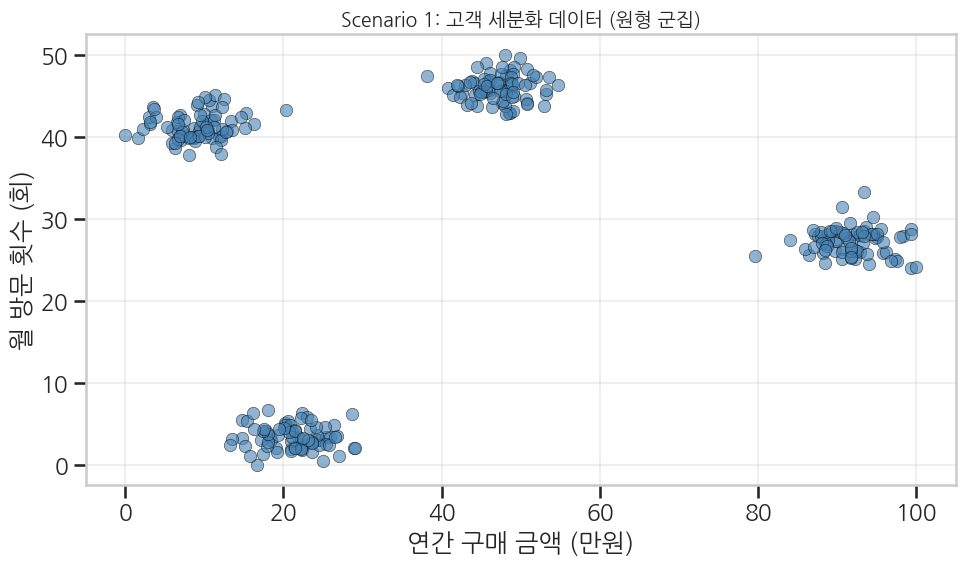

📊 데이터 특성:
- 샘플 수: 300개
- 특징: 원형으로 잘 분리된 군집 구조


In [3]:

# Scenario 1: 구형 군집 데이터 생성 (K-Means에 최적)
X1, y1_true = make_blobs(
    n_samples=300,
    centers=4,
    n_features=2,
    cluster_std=0.60,
    random_state=42
)

# 비즈니스 단위로 변환
X1_original = X1.copy()
X1_original[:, 0] = (X1[:, 0] - X1[:, 0].min()) / (X1[:, 0].max() - X1[:, 0].min()) * 100
X1_original[:, 1] = (X1[:, 1] - X1[:, 1].min()) / (X1[:, 1].max() - X1[:, 1].min()) * 50

df1 = pd.DataFrame(X1_original, columns=['Annual_Spending', 'Visit_Frequency'])

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df1['Annual_Spending'], df1['Visit_Frequency'], 
            alpha=0.6, s=80, edgecolors='k', linewidth=0.5, color='steelblue')
plt.xlabel('연간 구매 금액 (만원)', fontweight='bold')
plt.ylabel('월 방문 횟수 (회)', fontweight='bold')
plt.title('Scenario 1: 고객 세분화 데이터 (원형 군집)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 데이터 특성:")
print(f"- 샘플 수: {len(df1)}개")
print(f"- 특징: 원형으로 잘 분리된 군집 구조")


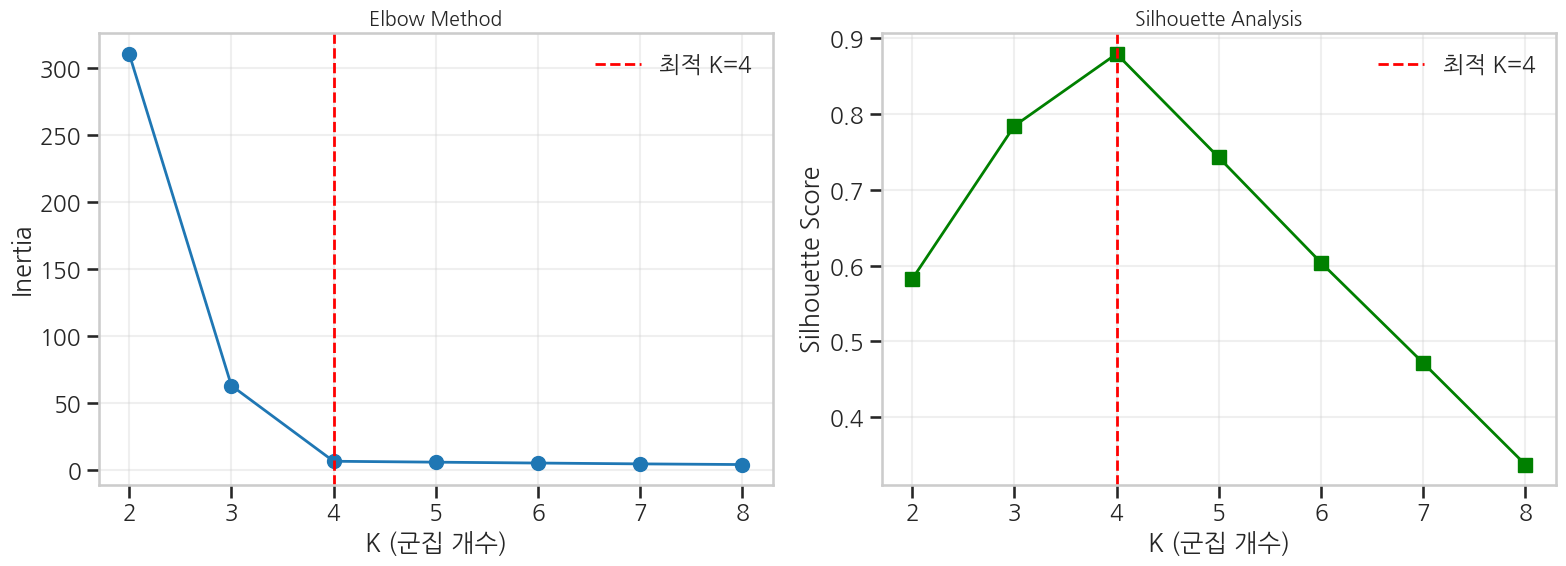


✅ 최적 군집 수: K=4 (Silhouette Score: 0.880)


In [4]:

# 스케일링
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(df1)

# Elbow Method로 최적 K 찾기
inertias = []
silhouettes = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X1_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X1_scaled, labels))

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=10)
ax1.set_xlabel('K (군집 개수)', fontweight='bold')
ax1.set_ylabel('Inertia', fontweight='bold')
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.axvline(x=4, color='red', linestyle='--', linewidth=2, label='최적 K=4')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Silhouette
ax2.plot(K_range, silhouettes, marker='s', linewidth=2, markersize=10, color='green')
ax2.set_xlabel('K (군집 개수)', fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontweight='bold')
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.axvline(x=4, color='red', linestyle='--', linewidth=2, label='최적 K=4')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_k = K_range[np.argmax(silhouettes)]
print(f"\n✅ 최적 군집 수: K={best_k} (Silhouette Score: {max(silhouettes):.3f})")


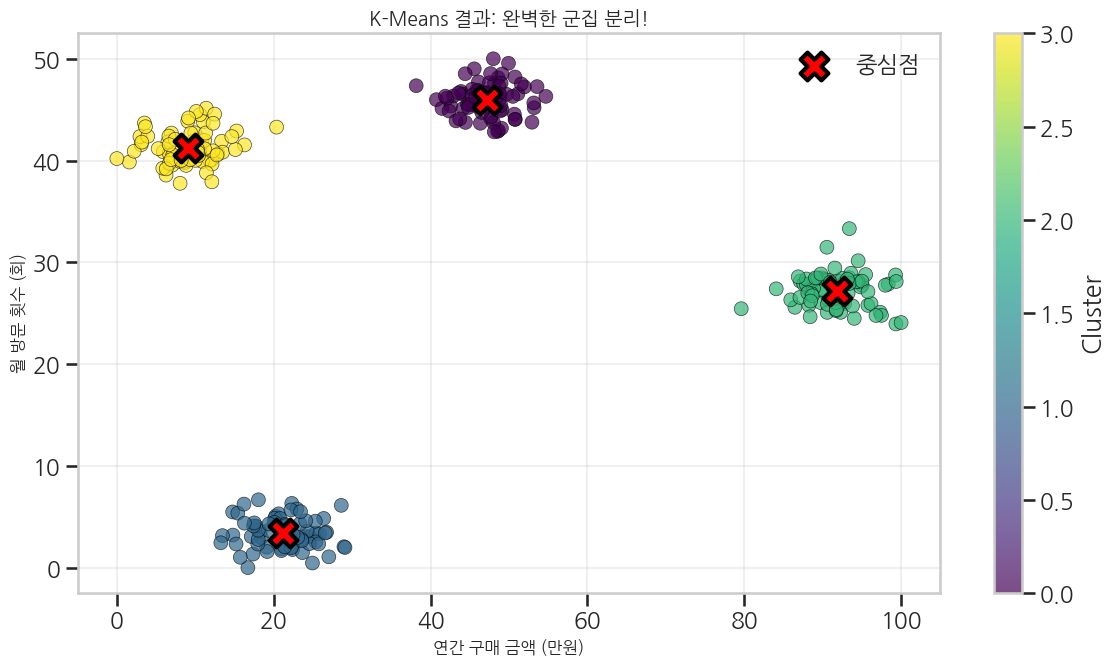


🎯 군집별 특성:
         Annual_Spending  Visit_Frequency  고객수
Cluster                                       
0                   47.2             46.0   75
1                   21.2              3.4   75
2                   91.8             27.2   75
3                    9.1             41.3   75

📊 성능 지표 (Silhouette Score): 0.880

✅ K-Means 성공: 명확한 군집 분리 + 해석 용이


In [5]:

# K-Means 최종 수행
kmeans1 = KMeans(n_clusters=4, random_state=42, n_init=10)
df1['Cluster'] = kmeans1.fit_predict(X1_scaled)

# 중심점
centers = scaler1.inverse_transform(kmeans1.cluster_centers_)

# 시각화
plt.figure(figsize=(12, 7))
scatter = plt.scatter(df1['Annual_Spending'], df1['Visit_Frequency'],
                      c=df1['Cluster'], cmap='viridis', s=100, alpha=0.7,
                      edgecolors='k', linewidth=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=400, marker='X',
            edgecolors='black', linewidth=3, label='중심점', zorder=5)
plt.xlabel('연간 구매 금액 (만원)', fontweight='bold', fontsize=12)
plt.ylabel('월 방문 횟수 (회)', fontweight='bold', fontsize=12)
plt.title('K-Means 결과: 완벽한 군집 분리!', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 군집별 프로파일
profile = df1.groupby('Cluster')[['Annual_Spending', 'Visit_Frequency']].mean()
profile['고객수'] = df1['Cluster'].value_counts().sort_index().values

# 최종 성능 지표 (원형 군집은 Silhouette 사용)
final_sil = silhouette_score(X1_scaled, df1['Cluster'])

print("\n🎯 군집별 특성:")
print(profile.round(1))
print(f"\n📊 성능 지표 (Silhouette Score): {final_sil:.3f}")
print("\n✅ K-Means 성공: 명확한 군집 분리 + 해석 용이")



---

# 🌙 Scenario 2: DBSCAN이 최적인 경우

## 2.1 비즈니스 상황: 제조 공정 이상 탐지

### 🎯 목표
센서 데이터를 분석하여 정상 작동 구간(복잡한 패턴)과 이상치(불량)를 구분합니다.

### ⚠️ 중요: Silhouette Score의 함정
- **Silhouette Score**는 군집이 **"동그랗고(Convex)" "빽빽한(Compact)"** 모양일 때 높게 나옵니다.
- **DBSCAN**이 찾는 **"길게 늘어진 반달 모양"**은 같은 군집이라도 끝과 끝이 멀어서 **점수가 낮게 나오는 왜곡**이 발생합니다.
- 따라서, 이번 시나리오에서는 **ARI (Adjusted Rand Index)** 지표를 사용하여 **"실제 정답과 얼마나 일치하는지"** 를 봅니다.

### ✅ DBSCAN이 최적인 이유
1. **비원형 군집:** 반달 모양을 정확히 따라감
2. **이상치 탐지:** 노이즈를 -1로 분류하여 제거


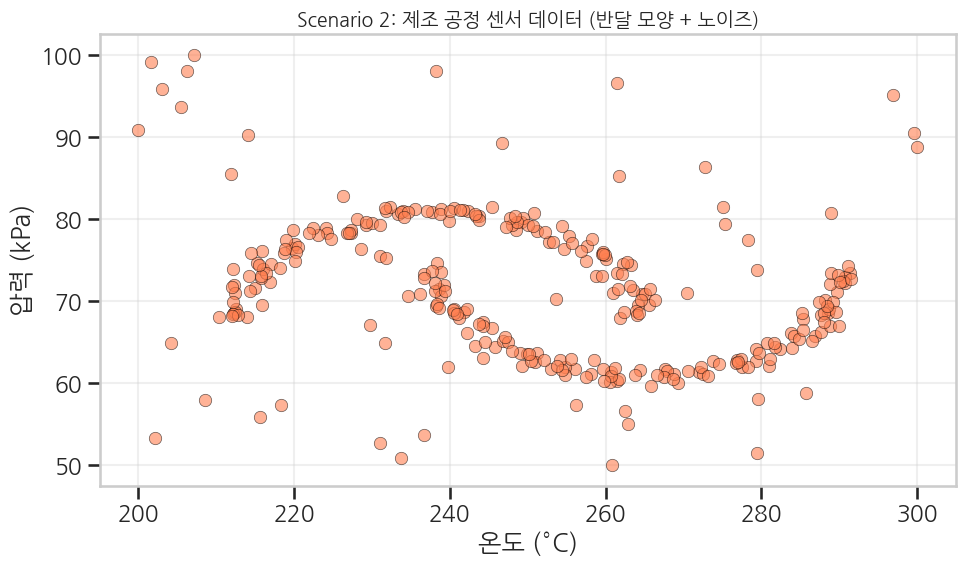

📊 데이터 특성:
- 샘플 수: 300개
- 특징: 반달 모양 2개 + 산발적 이상치


In [6]:

# Scenario 2: 복잡한 형태 데이터 생성
X2_moons, y2_moons = make_moons(n_samples=250, noise=0.05, random_state=42)

# 노이즈(이상치) 추가
np.random.seed(42)
n_noise = 50
noise = np.random.uniform(low=-1.5, high=2.5, size=(n_noise, 2))
X2 = np.vstack([X2_moons, noise])

# 정답지(Ground Truth) 생성 (노이즈는 -1로 라벨링)
y2_noise = np.full(n_noise, -1)
y2_true = np.concatenate([y2_moons, y2_noise])

# 비즈니스 단위로 스케일링
X2_original = X2.copy()
X2_original[:, 0] = (X2[:, 0] - X2[:, 0].min()) / (X2[:, 0].max() - X2[:, 0].min()) * 100 + 200
X2_original[:, 1] = (X2[:, 1] - X2[:, 1].min()) / (X2[:, 1].max() - X2[:, 1].min()) * 50 + 50

df2 = pd.DataFrame(X2_original, columns=['Temperature', 'Pressure'])

# 원본 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df2['Temperature'], df2['Pressure'], 
            alpha=0.6, s=80, edgecolors='k', linewidth=0.5, color='coral')
plt.xlabel('온도 (°C)', fontweight='bold')
plt.ylabel('압력 (kPa)', fontweight='bold')
plt.title('Scenario 2: 제조 공정 센서 데이터 (반달 모양 + 노이즈)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 데이터 특성:")
print(f"- 샘플 수: {len(df2)}개")
print(f"- 특징: 반달 모양 2개 + 산발적 이상치")


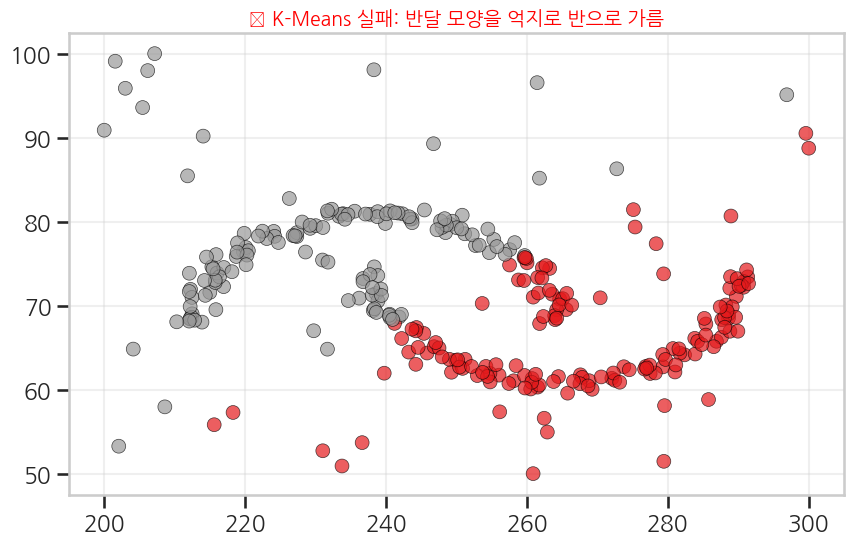

📊 K-Means 평가 결과:
- Silhouette Score: 0.433 (높음 = 역설적 상황!)
- ARI (정답 일치도): 0.247 (매우 낮음 = 실제 성능 나쁨)
👉 해석: 군집이 억지로 둥글게 잘려서 Silhouette은 높지만, 실제 패턴은 전혀 못 찾음.


In [7]:

# 1. K-Means 시도 (실패 사례)
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(df2)

kmeans2_fail = KMeans(n_clusters=2, random_state=42, n_init=10)
df2['KMeans_Fail'] = kmeans2_fail.fit_predict(X2_scaled)

# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2['Temperature'], df2['Pressure'],
                      c=df2['KMeans_Fail'], cmap='Set1', s=100, alpha=0.7,
                      edgecolors='k', linewidth=0.5)
plt.title('❌ K-Means 실패: 반달 모양을 억지로 반으로 가름', fontsize=14, fontweight='bold', color='red')
plt.grid(True, alpha=0.3)
plt.show()

# 성능 평가
sil_kmeans = silhouette_score(X2_scaled, df2['KMeans_Fail'])
ari_kmeans = adjusted_rand_score(y2_true, df2['KMeans_Fail'])

print(f"📊 K-Means 평가 결과:")
print(f"- Silhouette Score: {sil_kmeans:.3f} (높음 = 역설적 상황!)")
print(f"- ARI (정답 일치도): {ari_kmeans:.3f} (매우 낮음 = 실제 성능 나쁨)")
print("👉 해석: 군집이 억지로 둥글게 잘려서 Silhouette은 높지만, 실제 패턴은 전혀 못 찾음.")


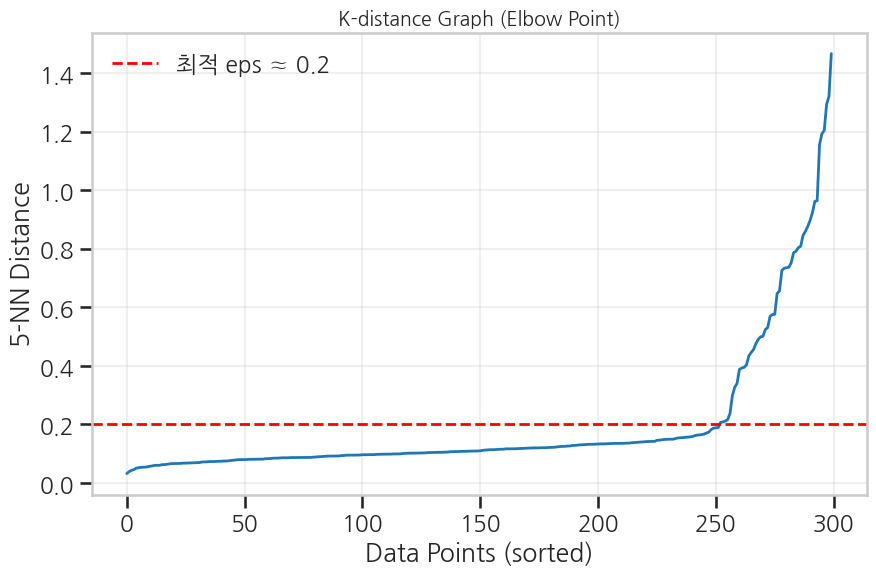

In [8]:

# 2. DBSCAN eps 최적값 찾기 (K-distance Graph)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X2_scaled)
distances, indices = neighbors_fit.kneighbors(X2_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances, linewidth=2)
plt.axhline(y=0.2, color='red', linestyle='--', linewidth=2, label='최적 eps ≈ 0.2')
plt.ylabel('5-NN Distance', fontweight='bold')
plt.xlabel('Data Points (sorted)', fontweight='bold')
plt.title('K-distance Graph (Elbow Point)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


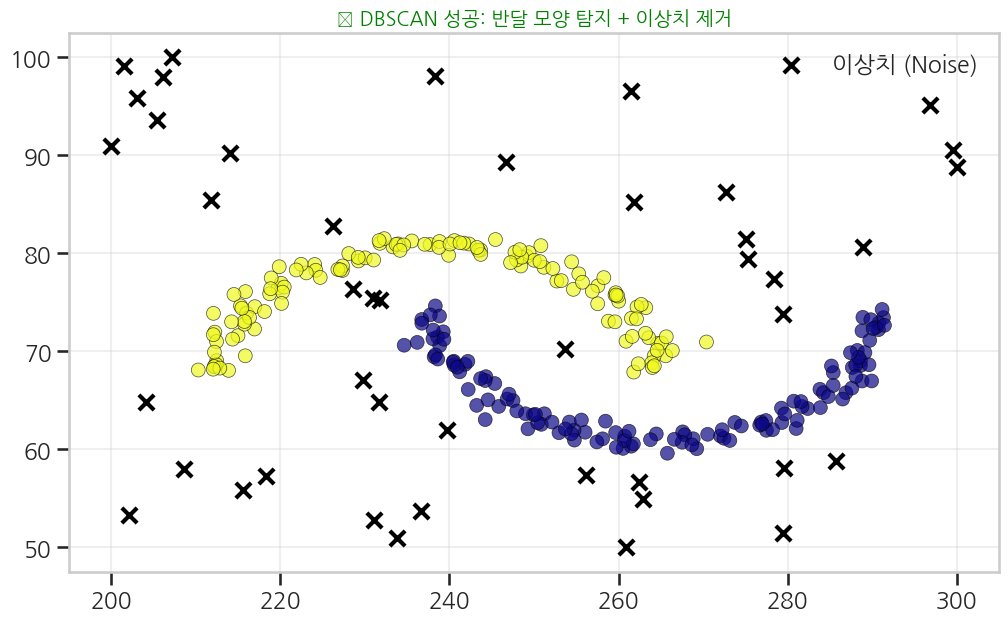


📊 DBSCAN 평가 결과:
- 이상치 탐지: 44개
- Silhouette Score: 0.256 (낮음 = 모양 때문에 왜곡됨)
- ARI (정답 일치도): 0.952 (매우 높음 = 실제 성능 완벽!)

🏆 결론: ARI 점수 0.247 vs 0.952 로 DBSCAN 압승!


In [9]:

# 3. DBSCAN 적용 (성공)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
df2['Cluster'] = dbscan2.fit_predict(X2_scaled)

# 시각화
plt.figure(figsize=(12, 7))
noise_mask = df2['Cluster'] == -1
plt.scatter(df2[noise_mask]['Temperature'], df2[noise_mask]['Pressure'],
            c='black', s=120, marker='x', linewidth=3, label='이상치 (Noise)')
normal_mask = ~noise_mask
scatter = plt.scatter(df2[normal_mask]['Temperature'], df2[normal_mask]['Pressure'],
                      c=df2[normal_mask]['Cluster'], cmap='plasma', s=100, alpha=0.7,
                      edgecolors='k', linewidth=0.5)

plt.title('✅ DBSCAN 성공: 반달 모양 탐지 + 이상치 제거', fontsize=14, fontweight='bold', color='green')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 성능 평가
n_noise = (df2['Cluster'] == -1).sum()
sil_dbscan = silhouette_score(X2_scaled, df2['Cluster']) if len(set(df2['Cluster'])) > 1 else -1
ari_dbscan = adjusted_rand_score(y2_true, df2['Cluster'])

print(f"\n📊 DBSCAN 평가 결과:")
print(f"- 이상치 탐지: {n_noise}개")
print(f"- Silhouette Score: {sil_dbscan:.3f} (낮음 = 모양 때문에 왜곡됨)")
print(f"- ARI (정답 일치도): {ari_dbscan:.3f} (매우 높음 = 실제 성능 완벽!)")
print(f"\n🏆 결론: ARI 점수 {ari_kmeans:.3f} vs {ari_dbscan:.3f} 로 DBSCAN 압승!")



---

# 🌳 Scenario 3: Hierarchical이 최적인 경우

## 3.1 비즈니스 상황: 전자제품 카테고리 분류

### 🎯 목표
200개의 전자제품을 특성(가격, 성능)에 따라 계층적으로 분류하여 쇼핑몰의 카테고리 트리를 구성합니다.

### 📊 데이터 특성
- **X축:** 가격 (만원)
- **Y축:** 성능 점수 (0-100)
- **구조:** 대분류(3개) → 중분류 → 소분류의 계층적 구조


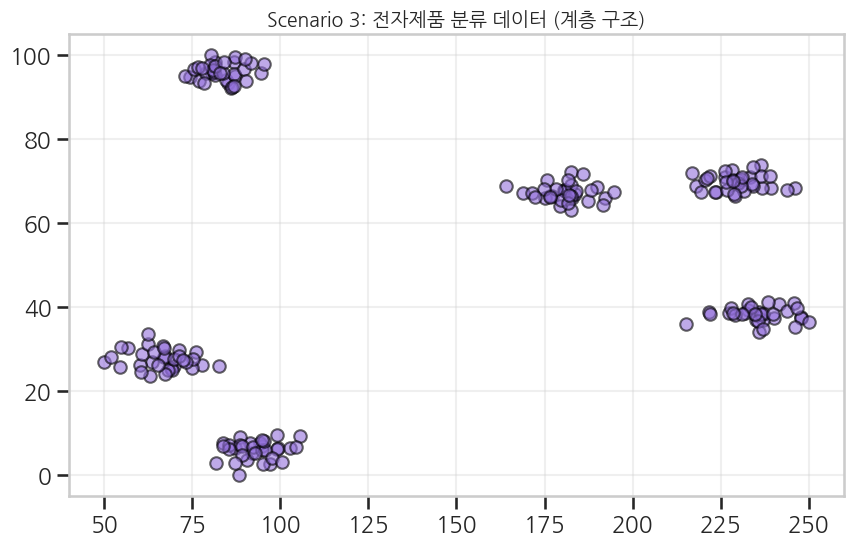

In [10]:

# Scenario 3: 계층 구조 데이터 생성
X3_main, y3_main = make_blobs(n_samples=200, centers=3, n_features=2, 
                               cluster_std=2.0, random_state=42)

# 계층 구조 생성 (대분류 내 소분류)
X3_sub = []
for i in range(3):
    mask = y3_main == i
    center = X3_main[mask].mean(axis=0)
    X_sub, _ = make_blobs(n_samples=mask.sum(), centers=2, n_features=2,
                          cluster_std=0.5, random_state=42+i)
    # 대분류 중심 주변으로 이동
    X_sub = X_sub - X_sub.mean(axis=0) + center
    X3_sub.append(X_sub)

X3 = np.vstack(X3_sub)

# 비즈니스 단위 변환
X3_original = X3.copy()
X3_original[:, 0] = (X3[:, 0] - X3[:, 0].min()) / (X3[:, 0].max() - X3[:, 0].min()) * 200 + 50
X3_original[:, 1] = (X3[:, 1] - X3[:, 1].min()) / (X3[:, 1].max() - X3[:, 1].min()) * 100

df3 = pd.DataFrame(X3_original, columns=['Price', 'Performance'])

plt.figure(figsize=(10, 6))
plt.scatter(df3['Price'], df3['Performance'], color='mediumpurple', alpha=0.6, edgecolor='k')
plt.title('Scenario 3: 전자제품 분류 데이터 (계층 구조)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


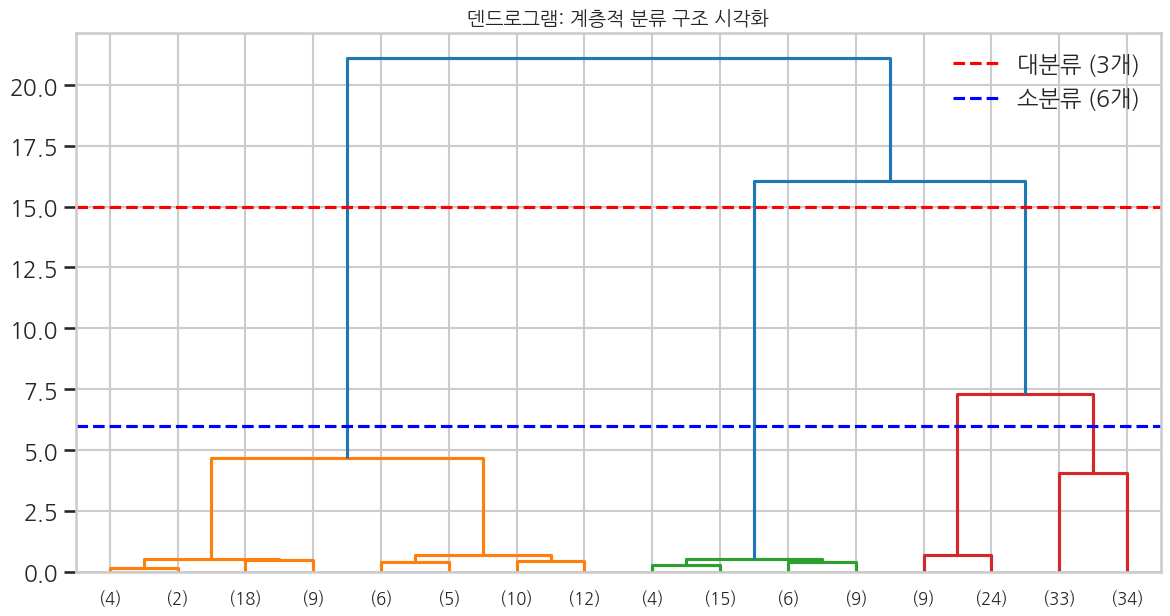

In [11]:

# 덴드로그램 시각화
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(df3)

linked = linkage(X3_scaled, method='ward')

plt.figure(figsize=(14, 7))
# dendrogram(linked, orientation='top', no_labels=True)
dendrogram(linked,
           truncate_mode='level',  # 상위 레벨만
           p=3)  # 깊이 3단계까지만


plt.axhline(y=15, color='red', linestyle='--', label='대분류 (3개)')
plt.axhline(y=6, color='blue', linestyle='--', label='소분류 (6개)')
plt.title('덴드로그램: 계층적 분류 구조 시각화', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


In [12]:
from scipy.cluster.hierarchy import fcluster

# 정확한 군집 수 계산
# y=6 높이에서 실제 군집 개수 확인
clusters_at_6 = fcluster(linked, t=6, criterion='distance')
print(f"y=6에서 군집 수: {len(set(clusters_at_6))}개")  # 실제 개수 출력

# y=12 높이에서 실제 군집 개수 확인
clusters_at_15 = fcluster(linked, t=15, criterion='distance')
print(f"y=12에서 군집 수: {len(set(clusters_at_15))}개")

y=6에서 군집 수: 4개
y=12에서 군집 수: 3개


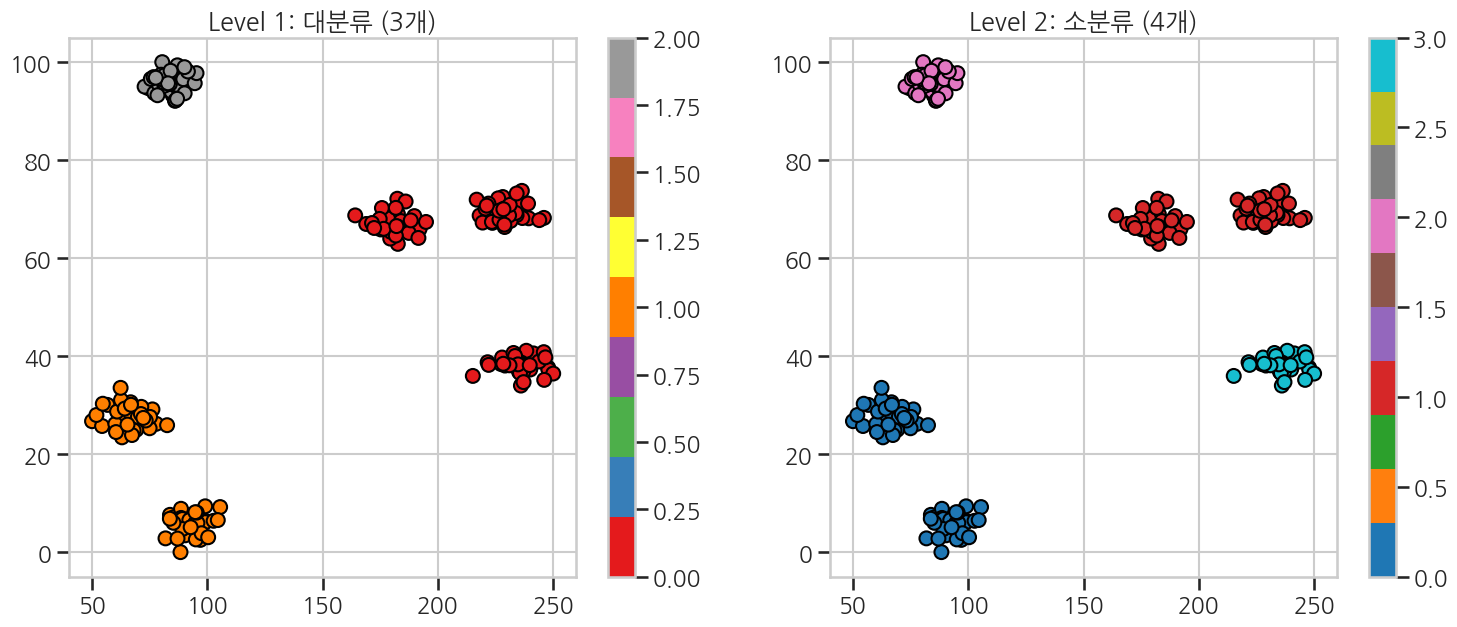

✅ Hierarchical 승리: 상위 그룹과 하위 그룹을 동시에 파악 가능!


In [13]:

# 계층적 군집화 결과
agg_main = AgglomerativeClustering(n_clusters=len(set(clusters_at_15)), linkage='ward')
df3['Category_Main'] = agg_main.fit_predict(X3_scaled)

agg_sub = AgglomerativeClustering(n_clusters=len(set(clusters_at_6)), linkage='ward')
df3['Category_Sub'] = agg_sub.fit_predict(X3_scaled)

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

scatter1 = ax1.scatter(df3['Price'], df3['Performance'], c=df3['Category_Main'], cmap='Set1', s=100, edgecolor='k')
ax1.set_title('Level 1: 대분류 (3개)', fontweight='bold')
plt.colorbar(scatter1, ax=ax1)

scatter2 = ax2.scatter(df3['Price'], df3['Performance'], c=df3['Category_Sub'], cmap='tab10', s=100, edgecolor='k')
ax2.set_title('Level 2: 소분류 (4개)', fontweight='bold')
plt.colorbar(scatter2, ax=ax2)

plt.show()

print("✅ Hierarchical 승리: 상위 그룹과 하위 그룹을 동시에 파악 가능!")


In [14]:

from IPython.display import display, Markdown

comparison_md = """
### 🏆 최종 알고리즘 비교

| Scenario | K-Means | DBSCAN | Hierarchical | 승리 요인 |
|:---:|:---:|:---:|:---:|:---|
| **고객 세분화**<br>(원형) | ✅ **최고**<br>(S_Score: High) | ⚠️ 보통 | ⚠️ 느림 | 빠르고 직관적 |
| **이상 탐지**<br>(비원형) | ❌ **실패**<br>(S_Score: Fake High) | ✅ **최고**<br>(ARI: High) | ❌ 부적합 | 형태 무관 + 이상치 탐지 |
| **제품 분류**<br>(계층형) | ⚠️ 계층X | ❌ 구조X | ✅ **최고**<br>(덴드로그램) | 트리 구조 시각화 |

**💡 핵심 요약**
1. **Silhouette Score**는 원형 군집에만 유효합니다. 복잡한 형태는 **눈으로 확인**하거나 **ARI**를 보세요.
2. 실무에서는 **K-Means를 먼저 시도**하고, 성능이 나쁘면 **DBSCAN**을 고려하세요.
"""

display(Markdown(comparison_md))



### 🏆 최종 알고리즘 비교

| Scenario | K-Means | DBSCAN | Hierarchical | 승리 요인 |
|:---:|:---:|:---:|:---:|:---|
| **고객 세분화**<br>(원형) | ✅ **최고**<br>(S_Score: High) | ⚠️ 보통 | ⚠️ 느림 | 빠르고 직관적 |
| **이상 탐지**<br>(비원형) | ❌ **실패**<br>(S_Score: Fake High) | ✅ **최고**<br>(ARI: High) | ❌ 부적합 | 형태 무관 + 이상치 탐지 |
| **제품 분류**<br>(계층형) | ⚠️ 계층X | ❌ 구조X | ✅ **최고**<br>(덴드로그램) | 트리 구조 시각화 |

**💡 핵심 요약**
1. **Silhouette Score**는 원형 군집에만 유효합니다. 복잡한 형태는 **눈으로 확인**하거나 **ARI**를 보세요.
2. 실무에서는 **K-Means를 먼저 시도**하고, 성능이 나쁘면 **DBSCAN**을 고려하세요.



---

#  실무 의사결정 가이드

### 🤔 "어떤 알고리즘을 써야 하나요?"

#### ✅ K-Means를 사용하세요 (가장 많이 사용)
- 데이터가 **원형으로 뭉쳐있을 때**
- **군집 개수를 대략 알 때** (Elbow Method로 확인 가능)
- **대용량 데이터**일 때 (속도가 빠름)
- **예시:** 고객 세분화, 이미지 압축, 추천 시스템

#### ✅ DBSCAN을 사용하세요
- 데이터가 **복잡한 형태**일 때 (반달, 나선형 등)
- **이상치(Outlier) 탐지**가 중요할 때
- **군집 개수를 모를 때**
- **예시:** 이상 거래 탐지, 지리 데이터 분석, 제조 불량 탐지

#### ✅ Hierarchical을 사용하세요
- **계층 구조**를 파악하고 싶을 때
- **소규모 데이터**일 때 (n < 10,000)
- **덴드로그램 시각화**가 필요할 때
- **예시:** 상품 카테고리 분류, 유전자 분석, 조직도 생성

---

##  각 알고리즘의 장단점 요약

### K-Means

**장점 ✅**
- 빠른 속도 (O(n) 수준)
- 직관적이고 해석 쉬움
- 대용량 데이터 처리 가능
- 중심점(평균)을 명확히 제공

**단점 ❌**
- 원형 군집만 가능
- K를 미리 정해야 함
- 이상치에 약함
- 초기값에 따라 결과 변동 가능

---

### DBSCAN

**장점 ✅**
- 임의 모양 군집 탐지
- 이상치 자동 제거
- K를 정할 필요 없음
- 밀도 기반 직관적 개념

**단점 ❌**
- eps, min_samples 튜닝 어려움
- 밀도가 불균일하면 실패
- 고차원 데이터에 약함
- 해석이 K-Means보다 어려움

---

### Hierarchical

**장점 ✅**
- 계층 구조 명확히 시각화
- K를 사후에 결정 가능
- 덴드로그램으로 전체 구조 파악
- 재현성 100% (난수 없음)

**단점 ❌**
- 느린 속도 (O(n²~n³))
- 대용량 데이터 불가
- 노이즈에 민감
- 메모리 많이 사용

---

## ✅ 최종 결론

### 🎯 핵심 메시지
**"만능 알고리즘은 없다. 데이터 특성과 비즈니스 목표에 맞춰 선택하라!"**

### 📚 실무 팁
1. **처음엔 항상 K-Means부터 시도하세요**
   - 80%의 경우 K-Means로 충분합니다

2. **K-Means가 이상하면 DBSCAN을 써보세요**
   - Silhouette Score가 0.3 이하면 의심

3. **계층이 중요하면 Hierarchical을 쓰세요**
   - 조직도, 카테고리, 분류체계 등

4. **항상 데이터를 먼저 시각화하세요**
   - 2D PCA로 투영해서 눈으로 확인

5. **여러 알고리즘을 비교하세요**
   - Silhouette, Davies-Bouldin 등으로 정량 평가

---

## 🎓 학습 포인트

이 가이드를 통해 배운 것:

1. ✅ **K-Means**: 원형 군집에 최적 (고객 세분화)
2. ✅ **DBSCAN**: 복잡한 형태 + 이상치 탐지 (제조 공정)
3. ✅ **Hierarchical**: 계층 구조 시각화 (상품 분류)
4. ✅ **평가 지표**: Elbow, Silhouette, ARI, 덴드로그램
5. ✅ **실무 의사결정**: 데이터 특성에 따른 알고리즘 선택법

---

### 🚀 다음 단계

- **고급 기법:** GMM(Gaussian Mixture Model), Spectral Clustering
- **하이브리드:** K-Means + DBSCAN 결합
- **비지도 학습:** Clustering + Dimensionality Reduction(PCA/t-SNE)
- **실전 프로젝트:** 실제 비즈니스 데이터로 A/B 테스트
